In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## How does log odds relate to probability

In [2]:
log_odds = np.linspace(-7, 7, 29)
odds = np.exp(log_odds)
prob = odds / (1+odds)

In [14]:
pd.DataFrame(
    np.vstack((log_odds, prob)),
    index=('Log Odds', 'Probability')
    ).T

,Log Odds,Probability
0,-7.0,0.000911
1,-6.5,0.001501
2,-6.0,0.002473
3,-5.5,0.004070
4,-5.0,0.006693
5,-4.5,0.010987
6,-4.0,0.017986
7,-3.5,0.029312
8,-3.0,0.047426
9,-2.5,0.075858


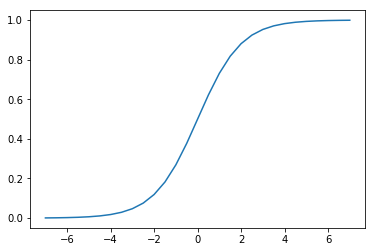

In [4]:
plt.plot(log_odds, prob)

In [14]:
## Playing with toy data

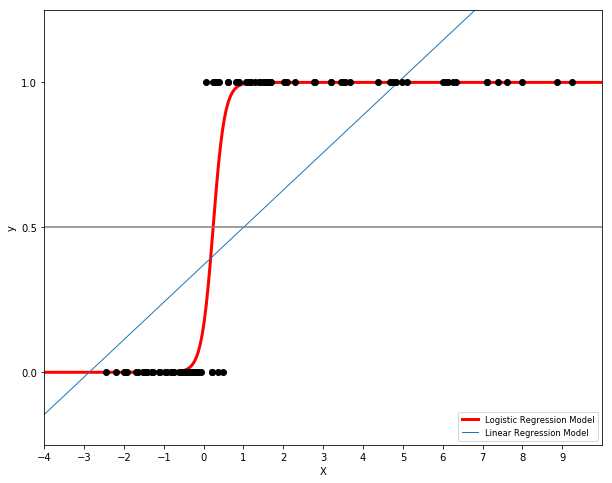

In [13]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py

from sklearn import linear_model

fig = plt.figure(figsize=(10,8))
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()